## 加载第三方库

In [2]:
import warnings
warnings.filterwarnings('ignore')
import os
os.chdir(r'E:/pycharm codes/百货商场用户画像描绘与价值分析/data/data')
import pandas as pd

## 数据读取和数据探索

In [3]:
info_data = pd.read_excel('cumcm2018c1.xlsx')  # 会员信息表
xs_data = pd.read_csv('cumcm2018c2.csv')  # 销售流水表

In [4]:
info_data.head()

,kh,csrq,xb,djsj
0,c68b20b4,2002-11-02,0.0,2013-05-11 00:00:00.000
1,1ca15332,NaT,0.0,2004-11-04 16:31:52.436
2,a37cc182,1967-02-17,0.0,2004-12-31 21:24:34.216
3,2ab88539,1982-06-01,0.0,2010-11-19 00:00:00.000
4,b4c77269,1964-02-05,0.0,2007-12-14 00:00:00.000


In [5]:
xs_data.head()

,kh,dtime,spbm,sl,sj,je,spmc,jf,syjh,djh,gzbm,gzmc
0,1be1e3fe,2015-01-01 00:05:41.593,f09c9303,1,290.0,270.20,兰芝化妆品正价瓶,270.20,6,25bb,8077.0,兰芝柜
1,1be1e3fe,2015-01-01 00:05:41.593,f09c9303,1,325.0,302.80,兰芝化妆品正价瓶,302.80,6,25bb,8077.0,兰芝柜
2,1be1e3fe,2015-01-01 00:05:41.593,f09c9303,1,195.0,181.80,兰芝化妆品正价瓶,181.80,6,25bb,8077.0,兰芝柜
3,1be1e3fe,2015-01-01 00:05:41.593,f09c9303,1,270.0,251.55,兰芝化妆品正价瓶,251.55,6,25bb,8077.0,兰芝柜
4,1be1e3fe,2015-01-01 00:05:41.593,f09c9303,2,245.0,456.55,兰芝化妆品正价瓶,456.55,6,25bb,8077.0,兰芝柜


In [6]:
#查看缺失值
print('会员信息表的缺失值情况：\n',info_data.isnull().sum())
print('销售流水表的缺失值情况：\n',xs_data.isnull().sum())

会员信息表的缺失值情况：
 kh          0
csrq    34188
xb       9435
djsj    12681
dtype: int64
销售流水表的缺失值情况：
 kh       1017486
dtime          0
spbm           0
sl             0
sj             0
je             0
spmc           0
jf       1017486
syjh           0
djh            0
gzbm     1017486
gzmc     1036956
dtype: int64


In [7]:
info_data.dtypes

kh              object
csrq    datetime64[ns]
xb             float64
djsj    datetime64[ns]
dtype: object

In [8]:
xs_data.dtypes

kh        object
dtime     object
spbm      object
sl         int64
sj       float64
je       float64
spmc      object
jf       float64
syjh       int64
djh       object
gzbm     float64
gzmc      object
dtype: object

## 数据预处理

In [9]:
# 设置列名
info_data.columns = ['会员卡号','出生日期','性别','登记时间']
xs_data.columns = ['会员卡号','消费产生的时间','商品编码','销售数量','商品售价','消费金额','商品名称','此次消费的会员积分','收银机号','单据号','柜组编码','柜组名称']

### 会员信息表

In [10]:
## 缺失值处理
print('删除缺失值前的数据形状：',info_data.shape)
print('缺失值统计：',info_data.isnull().sum())
info_data = info_data.dropna()
print('删除空值后的数据形状：',info_data.shape)
print('缺失值统计：',info_data.isnull().sum())

删除缺失值前的数据形状： (194740, 4)
缺失值统计： 会员卡号        0
出生日期    34188
性别       9435
登记时间    12681
dtype: int64
删除空值后的数据形状： (153475, 4)
缺失值统计： 会员卡号    0
出生日期    0
性别      0
登记时间    0
dtype: int64


In [11]:
## 去重
print(info_data.shape)
print(info_data.drop_duplicates().shape) #行数减少，则说明有重复的会员号出现
info_data = info_data.drop_duplicates()

(153475, 4)
(153475, 4)


In [12]:
## 日期数据转换
info_data['出生日期'] = info_data['出生日期'].apply(lambda x: pd.to_datetime(x) if type(x)==str else x)
# info_data['出生日期'] = pd.to_datetime(info_data['出生日期'],errors = 'ignore')
info_data['出生日期']

0        2002-11-02
2        1967-02-17
3        1982-06-01
4        1964-02-05
5        1968-06-18
            ...    
194729   1993-06-24
194731   1979-04-23
194732   1981-03-02
194738   1973-01-10
194739   1964-08-11
Name: 出生日期, Length: 153475, dtype: datetime64[ns]

In [13]:
## 剔除会员登记时间早于会员出生年月的数据
info_data = info_data[info_data['登记时间']>info_data['出生日期']] 

In [14]:
## 2.1.4 同一会员多个登记时间只保留最早的记录
count_kh = info_data['会员卡号'].value_counts()
count_kh = count_kh[count_kh>1]
for i in count_kh.index:
    max_data = info_data[info_data['会员卡号']==i]['登记时间'].max()
    indexs = info_data[(info_data['会员卡号']==i) & (info_data['登记时间'] !=max_data)].index
    info_data = info_data.drop(indexs)

In [15]:
info_data.shape

(153449, 4)

### 销售流水表

In [16]:
## 日期数据转换
xs_data['消费产生的时间'] = pd.to_datetime(xs_data['消费产生的时间'])

In [17]:
## 剔除销售数量为负值的销售记录，剔除消费金额为0或负值的销售记录
xs_data = xs_data[xs_data['销售数量']>0] 
xs_data = xs_data[xs_data['消费金额']>0]

In [18]:
#去重
print(xs_data.shape)
print(xs_data.drop_duplicates().shape) #行数没有减少，说明不存在重复的行

(1861251, 12)
(1861251, 12)


In [19]:
print('删除空值后的数据形状：',xs_data.shape)

删除空值后的数据形状： (1861251, 12)


### 数据合并

In [20]:
## 将会员信息表与销售流水表进行合并,采用外连接合并方式
data = xs_data.merge(info_data, how='outer')
data.to_csv('task1.csv', index=False, encoding='gbk')

In [21]:
print('预处理后数据的大小：',data.shape)

预处理后数据的大小： (1973797, 15)


In [22]:
data.head()

,会员卡号,消费产生的时间,商品编码,销售数量,商品售价,消费金额,商品名称,此次消费的会员积分,收银机号,单据号,柜组编码,柜组名称,出生日期,性别,登记时间
0,1be1e3fe,2015-01-01 00:05:41.593,f09c9303,1.0,290.0,270.20,兰芝化妆品正价瓶,270.20,6.0,25bb,8077.0,兰芝柜,NaT,NaN,NaT
1,1be1e3fe,2015-01-01 00:05:41.593,f09c9303,1.0,325.0,302.80,兰芝化妆品正价瓶,302.80,6.0,25bb,8077.0,兰芝柜,NaT,NaN,NaT
2,1be1e3fe,2015-01-01 00:05:41.593,f09c9303,1.0,195.0,181.80,兰芝化妆品正价瓶,181.80,6.0,25bb,8077.0,兰芝柜,NaT,NaN,NaT
3,1be1e3fe,2015-01-01 00:05:41.593,f09c9303,1.0,270.0,251.55,兰芝化妆品正价瓶,251.55,6.0,25bb,8077.0,兰芝柜,NaT,NaN,NaT
4,1be1e3fe,2015-01-01 00:05:41.593,f09c9303,2.0,245.0,456.55,兰芝化妆品正价瓶,456.55,6.0,25bb,8077.0,兰芝柜,NaT,NaN,NaT


## 描述性统计分析和可视化

### 加载第三方库

In [23]:
import os
os.chdir(r'E:/pycharm codes/百货商场用户画像描绘与价值分析/data/data')
import pandas as pd
import datetime
import warnings
import matplotlib.pyplot as plt
warnings.filterwarnings('ignore')
plt.rcParams['font.sans-serif'] = ['SimHei']  # 用来正常显示中文标签
plt.rcParams['axes.unicode_minus'] = False  # 用来正常显示负号
plt.style.use('ggplot') # 定义绘图风格
print(plt.style.available) # 查看所有系统定义的绘图风格

['bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark-palette', 'seaborn-dark', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'seaborn', 'Solarize_Light2', 'tableau-colorblind10', '_classic_test']


### 分析会员的年龄构成、男女比例等基本信息

In [24]:
xs_data = pd.read_csv('task1.csv', encoding='gbk') # 销售数据
# 日期数据处理
xs_data['消费产生的时间'] = pd.to_datetime(xs_data['消费产生的时间'])
xs_data['登记时间'] = pd.to_datetime(xs_data['登记时间'],errors='ignore')
xs_data['出生日期'] = pd.to_datetime(xs_data['出生日期'])

In [25]:
## 提取时间信息
date = xs_data['消费产生的时间'].max()
xs_data['时刻'] = xs_data['消费产生的时间'].apply(lambda x: x.hour)
xs_data['月份'] = xs_data['消费产生的时间'].apply(lambda x: x.month)
xs_data['年份'] = xs_data['消费产生的时间'].apply(lambda x: str(x.year))

In [26]:
xs_data['年份'].value_counts()

2016    833792
2017    781227
2015    240798
nan     112546
2018      5434
Name: 年份, dtype: int64

In [27]:
xs_data['月份'].value_counts()

1.0     211957
3.0     207747
5.0     191429
8.0     185200
2.0     169688
4.0     158824
7.0     152703
6.0     146645
9.0     139871
11.0    119653
12.0     92576
10.0     84958
Name: 月份, dtype: int64

In [28]:
xs_data['时刻'].value_counts()

16.0    212132
15.0    201078
17.0    187103
14.0    180506
13.0    158243
18.0    153479
20.0    147022
12.0    142507
19.0    134764
21.0    126787
11.0    116767
10.0     68077
22.0     24157
23.0      7721
9.0        722
0.0        143
1.0         36
2.0          7
Name: 时刻, dtype: int64

In [29]:
xs_data.shape

(1973797, 18)

In [30]:
xs_data.head()

,会员卡号,消费产生的时间,商品编码,销售数量,商品售价,消费金额,商品名称,此次消费的会员积分,收银机号,单据号,柜组编码,柜组名称,出生日期,性别,登记时间,时刻,月份,年份
0,1be1e3fe,2015-01-01 00:05:41.593,f09c9303,1.0,290.0,270.20,兰芝化妆品正价瓶,270.20,6.0,25bb,8077.0,兰芝柜,NaT,NaN,NaT,0.0,1.0,2015
1,1be1e3fe,2015-01-01 00:05:41.593,f09c9303,1.0,325.0,302.80,兰芝化妆品正价瓶,302.80,6.0,25bb,8077.0,兰芝柜,NaT,NaN,NaT,0.0,1.0,2015
2,1be1e3fe,2015-01-01 00:05:41.593,f09c9303,1.0,195.0,181.80,兰芝化妆品正价瓶,181.80,6.0,25bb,8077.0,兰芝柜,NaT,NaN,NaT,0.0,1.0,2015
3,1be1e3fe,2015-01-01 00:05:41.593,f09c9303,1.0,270.0,251.55,兰芝化妆品正价瓶,251.55,6.0,25bb,8077.0,兰芝柜,NaT,NaN,NaT,0.0,1.0,2015
4,1be1e3fe,2015-01-01 00:05:41.593,f09c9303,2.0,245.0,456.55,兰芝化妆品正价瓶,456.55,6.0,25bb,8077.0,兰芝柜,NaT,NaN,NaT,0.0,1.0,2015


In [31]:
## 划分会员与非会员数据
vip = xs_data[xs_data['会员卡号'].notnull()]# 提取会员数据
vip_data = vip.dropna() # 剔除基本信息为空的会员数据
nvip = xs_data[~xs_data['会员卡号'].notnull()]

In [32]:
vip.shape

(979257, 18)

In [33]:
vip_data.shape

(440557, 18)

In [34]:
nvip.shape

(994540, 18)

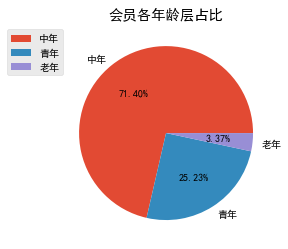

In [35]:
## 会员年龄可视化分析
vip_data['年龄'] = vip_data['出生日期'].apply(lambda x: date.year-x.year)
vip_data = vip_data[(vip_data['年龄']>=16) & (vip_data['年龄']<=90)]
vip_data['年龄分段'] = pd.cut(vip_data.年龄, 
         [min(vip_data.年龄)-1, 35, 59, max(vip_data.年龄)+1], 
         labels=['青年', '中年', '老年'])
age_counts = vip_data['年龄分段'].value_counts()
plt.pie(age_counts, labels=age_counts.index, autopct='%.2f%%')
plt.legend(bbox_to_anchor=(0.05, 1),ncol=1)
plt.title('会员各年龄层占比')
plt.show()

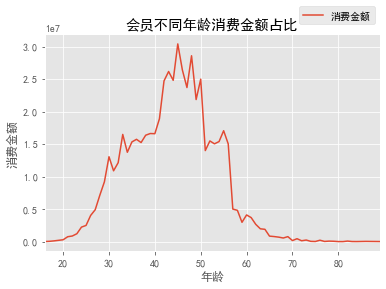

In [36]:
## 会员消费金额分析
age_je= vip_data.groupby(by=['年龄'])['消费金额'].sum()
age_je.plot()
plt.ylabel('消费金额')
plt.legend(bbox_to_anchor=(1, 1.15),ncol=1)
plt.title('会员不同年龄消费金额占比')
plt.show()

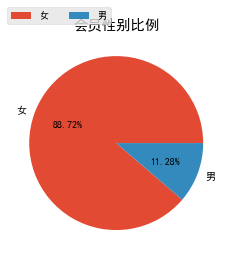

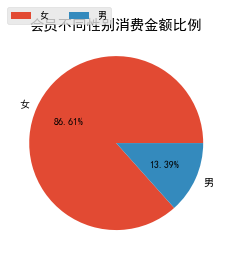

In [37]:
## 会员性别分析
sex_counts = vip_data['性别'].value_counts()
sex_je = vip_data.groupby(by=['性别'])['消费金额'].sum()
plt.pie(sex_counts, labels=['女', '男'], autopct='%.2f%%')
plt.legend(bbox_to_anchor=(0.5, 1.15),ncol=2)
plt.title('会员性别比例')
plt.show()
plt.pie(sex_je, labels=['女', '男'], autopct='%.2f%%')
plt.legend(bbox_to_anchor=(0.5, 1.15),ncol=2)
plt.title('会员不同性别消费金额比例')
plt.show()

### 分析会员的总订单占比，总消费金额占比等消费情况

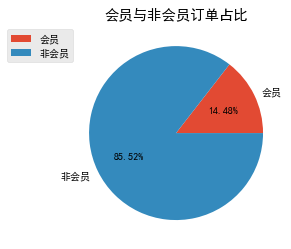

In [38]:
### 会员订单占比分析
plt.pie([len(vip.单据号.unique()), len(nvip.单据号.unique())], 
        labels=["会员", "非会员"], 
        autopct='%.2f%%')
plt.legend(bbox_to_anchor=(0.05, 1),ncol=1)
plt.title('会员与非会员订单占比')
plt.show()

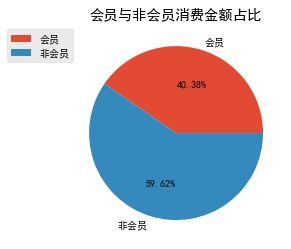

In [39]:
### 会员消费金额占比
plt.pie([vip_data.消费金额.sum(), nvip.消费金额.sum()], 
        labels=["会员", "非会员"], 
        autopct='%.2f%%')
plt.legend(bbox_to_anchor=(0.05, 1),ncol=1)
plt.title('会员与非会员消费金额占比')
plt.show()

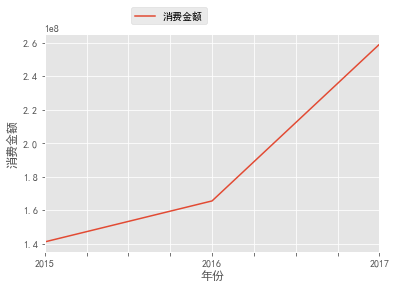

In [40]:
### 会员年消费额折线图
v_ygrow = vip_data.groupby(by=['年份'])['消费金额'].sum()
v_ygrow[:-1].plot()
plt.ylabel('消费金额')
plt.legend(bbox_to_anchor=(0.5, 1.15),ncol=2)
plt.show()

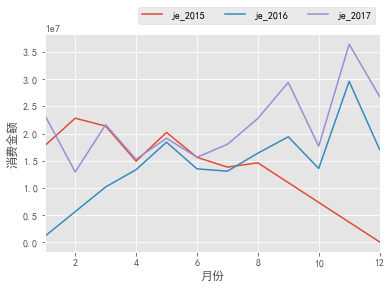

In [41]:
### 会员不同年份月消费额折线图
v_mgrow = vip_data.groupby(by=['年份', '月份'])['消费金额'].sum()
v_2015 = v_mgrow.xs('2015', level='年份').rename('je_2015')
v_2016 = v_mgrow.xs('2016', level='年份').rename('je_2016')
v_2017 = v_mgrow.xs('2017', level='年份').rename('je_2017')
v_mgrow = pd.concat([v_2015, v_2016, v_2017], axis=1)
# 对数据中的空值用线性差值进行填充
v_mgrow = v_mgrow.interpolate()
v_mgrow.plot()
plt.ylabel('消费金额')
plt.legend(bbox_to_anchor=(1, 1.15),ncol=3)
plt.show()

### 分别以季度和天为单位，分析不同时间段会员的消费时间偏好

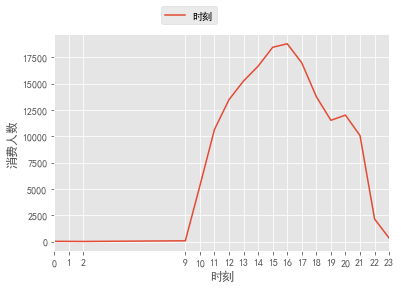

In [42]:
## 会员一天中消费时段偏好
v_data = vip_data[['会员卡号', '时刻', '月份', '年份']] # 提取会员每次消费的时间
v_data = v_data.drop_duplicates()
bins=[min(v_data.时刻)-1, 6, 10, 14, 18, max(v_data.时刻)+1]
v_data['时段偏好'] = pd.cut(v_data.时刻, bins, labels=['凌晨', '早上', '中午', '下午', '晚上'])
tp = v_data.groupby(by=['会员卡号'])['时段偏好'].value_counts()
tp = tp.rename('counts')
tp_max = tp.groupby(level=['会员卡号']).max()
tp = tp.reset_index()
tp_max = tp_max.reset_index()
tp = tp.merge(tp_max)
hour_count = v_data['时刻'].value_counts()
hour_count = hour_count.sort_index()
hour_count.plot()
# plt.title('24小时消费情况折线图')
plt.ylabel('消费人数')
plt.xlabel('时刻')
plt.xticks(hour_count.index)
plt.legend(bbox_to_anchor=(0.5, 1.15),ncol=2)
plt.show()
vip_data = vip_data.merge(tp[['会员卡号', '时段偏好']]) # 将时段偏好合并到会员数据中

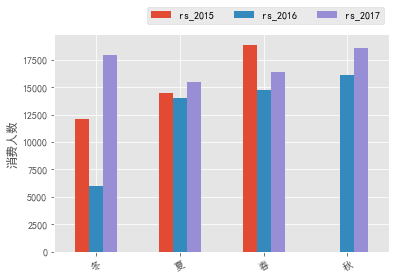

In [43]:
## 会员季节消费偏好
bins = [0, 1, 2, 3, 4]
v_data['季节偏好'] = pd.cut((v_data['月份']%12+3)//3, bins, labels=['冬', '春', '夏', '秋'])
v_mpeople = v_data.groupby(by=['年份'])['季节偏好'].value_counts()
v_2015 = v_mpeople.xs('2015', level='年份').rename('rs_2015')
v_2016 = v_mpeople.xs('2016', level='年份').rename('rs_2016')
v_2017 = v_mpeople.xs('2017', level='年份').rename('rs_2017')
v_mpeople = pd.concat([v_2015, v_2016, v_2017], axis=1)
# v_mpeople = v_mpeople.interpolate()
v_mpeople.plot(kind='bar')
plt.ylabel('消费人数')
plt.xticks(rotation=30)
plt.legend(bbox_to_anchor=(1, 1.15),ncol=3)
plt.show()
vip_data = vip_data.merge(v_data[['会员卡号', '季节偏好']]) # 将季节偏好合并到会员数据中

In [44]:
vip_data.shape

(9660800, 22)

In [45]:
vip_data = vip_data.sort_values(by=['消费产生的时间']) # 将字段合并到会员数据中
vip_data.to_csv('task2.csv', index=False, encoding='gbk') # 将会员数据输出保存

In [46]:
vip_data.head()

,会员卡号,消费产生的时间,商品编码,销售数量,商品售价,消费金额,商品名称,此次消费的会员积分,收银机号,单据号,...,出生日期,性别,登记时间,时刻,月份,年份,年龄,年龄分段,时段偏好,季节偏好
0,d8d36575,2015-01-01 00:06:38.313,d313ab1e,1.0,1760.0,1760.0,MARYLINGC件,1678.82,10.0,5858,...,1973-10-25,0.0,2007-08-12,0.0,1.0,2015,45,中年,晚上,冬
68,d8d36575,2015-01-01 00:06:38.313,50a2c4f5,1.0,899.0,899.0,汤普葛罗女鞋活动促销双,857.54,10.0,5858,...,1973-10-25,0.0,2007-08-12,0.0,1.0,2015,45,中年,晚上,春
67,d8d36575,2015-01-01 00:06:38.313,50a2c4f5,1.0,899.0,899.0,汤普葛罗女鞋活动促销双,857.54,10.0,5858,...,1973-10-25,0.0,2007-08-12,0.0,1.0,2015,45,中年,晚上,夏
66,d8d36575,2015-01-01 00:06:38.313,50a2c4f5,1.0,899.0,899.0,汤普葛罗女鞋活动促销双,857.54,10.0,5858,...,1973-10-25,0.0,2007-08-12,0.0,1.0,2015,45,中年,晚上,夏
65,d8d36575,2015-01-01 00:06:38.313,50a2c4f5,1.0,899.0,899.0,汤普葛罗女鞋活动促销双,857.54,10.0,5858,...,1973-10-25,0.0,2007-08-12,0.0,1.0,2015,45,中年,晚上,春


## 建立会员用户画像

### 构建会员用户基本特征标签

In [48]:
import os
os.chdir(r'E:/pycharm codes/百货商场用户画像描绘与价值分析/data/data')
import pandas as pd
import numpy as np
import warnings
import matplotlib.pyplot as plt
warnings.filterwarnings('ignore')
plt.rcParams['font.sans-serif'] = ['SimHei']  # 用来正常显示中文标签
plt.rcParams['axes.unicode_minus'] = False  # 用来正常显示负号
plt.style.use('ggplot') # 定义绘图风格
xs_data = pd.read_csv('task2.csv', encoding='gbk') # 读取数据
# 日期数据处理
xs_data['消费产生的时间'] = pd.to_datetime(xs_data['消费产生的时间'])
xs_data['登记时间'] = pd.to_datetime(xs_data['登记时间'])
date = xs_data['消费产生的时间'].max()
xs_data['性别'] = xs_data['性别'].apply(lambda x:'男' if x>0 else '女')

In [49]:
# 计算会员积分
jf = xs_data.groupby(by=['会员卡号']).agg({'此次消费的会员积分':np.sum})
jf['会员积分'] = pd.cut(jf['此次消费的会员积分'], 
  [min(jf['此次消费的会员积分'])-1, 10000, 100000, max(jf['此次消费的会员积分'])+1], 
  labels=['积分低等级', '积分中等级', '积分高等级'])
jf = jf.reset_index()
xs_data = xs_data.merge(jf[['会员卡号', '会员积分']], on='会员卡号', how='outer')

### 构建会员用户业务特征标签

In [50]:
# 计算会员入会程度 L
xs_data['L'] = xs_data['登记时间'].apply(lambda x:(date-x).days/30)
xs_data['入会程度'] = pd.cut(xs_data.L, 
       [min(xs_data.L)-1, 3, 12, max(xs_data.L)+1], 
       labels=['新用户', '中等用户', '老用户'])

# 计算消费频率 F
f = pd.pivot_table(xs_data[['会员卡号', '消费产生的时间']].drop_duplicates(), 
                   index='会员卡号', values='消费产生的时间', aggfunc='count')
f.columns=['F']
f = f.reset_index()
f['消费频率'] = pd.cut(f.F, [min(f.F)-1, 6, 30, max(f.F)+1], 
labels=['低频消费', '中等频率消费', '高频消费'])

# 计算消费水平 M
levels = xs_data.groupby(by=['会员卡号']).agg({'消费金额':np.sum})
levels['消费水平'] = pd.cut(levels.消费金额, 
      [min(levels.消费金额)-1, 10000, 100000, max(levels.消费金额)+1], 
       labels=['低消费水平', '中等消费水平', '高消费水平'])
levels = levels.reset_index()
levels.columns = ['会员卡号', 'M', '消费水平']

# 会员平均每单消费额
avg = f.merge(levels)
avg['avg_m'] = avg['M']/avg['F']
avg['平均每单价值'] = pd.cut(avg.avg_m, 
   [min(avg.avg_m)-1, 500, 3500, max(avg.avg_m)+1], 
   labels=['每单价值低', '每单价值一般', '每单价值高'])
xs_data = xs_data.merge(avg[['会员卡号', 'F', '消费频率', 
                             '消费水平', 'M', '平均每单价值']], on='会员卡号')

# 计算最近消费时间 R 
r = xs_data.groupby(by=['会员卡号'])['消费产生的时间'].max()
r = r.reset_index()
r['R'] = r['消费产生的时间'].apply(lambda x: (date-x).days+1)
xs_data = xs_data.merge(r[['会员卡号', 'R']], on='会员卡号', how='outer')

# 计算相邻两次消费最大时间间隔 D
kh_counts = xs_data.groupby(by=['会员卡号'])['消费产生的时间'].value_counts()
kh_counts = kh_counts.rename('counts')
kh_counts = kh_counts.reset_index() 
time_cell=[]
for i in kh_counts.会员卡号.value_counts().index:
    d = kh_counts[kh_counts['会员卡号']==i]
    if len(d)>1:
        d = d.sort_values(by=['消费产生的时间'])
        d.index = range(len(d))
        x=[]
        for i in range(len(d)-1):
            x.append((d.loc[i+1, '消费产生的时间'] - d.loc[i, '消费产生的时间']).days+1)
        d['D'] = max(x)
    else:
        d['D'] = 0 
    time_cell.append(d)
time_cell = pd.concat(time_cell)
time_cell['购买周期'] = None
time_cell['购买周期'][(time_cell['D']<=15) & (time_cell['D']!=0)]='短周期'
time_cell['购买周期'][(time_cell['D']>=15) & (time_cell['D']<180)]='中等周期'
time_cell['购买周期'][(time_cell['D']>180) | (time_cell['D']==0)]='长周期'
time_cell = time_cell[['会员卡号', 'D', '购买周期']].drop_duplicates()
xs_data = xs_data.merge(time_cell[['会员卡号', 'D', '购买周期']], on='会员卡号', how='outer')

### 会员用户兴趣特征

In [51]:
# 计算会员购物偏好
gz_p = xs_data.groupby(by=['会员卡号'])['柜组名称'].value_counts()
gz_p = gz_p.rename('counts')
gz_p = gz_p.reset_index()
gz_count = gz_p.groupby(by=['会员卡号'])['counts'].max().reset_index()
gz_p = gz_p.merge(gz_count)
gz_p.columns = ['会员卡号', '商品偏好', 'counts']
xs_data = xs_data.merge(gz_p[['会员卡号', '商品偏好']], on='会员卡号', how='outer')

In [52]:
data = xs_data[['会员卡号', 'F', 'R', 'M', 'D', '性别', '年龄', '年龄分段', '会员积分',
                '时段偏好', '季节偏好', '入会程度', '消费水平', 
                '消费频率', '平均每单价值', '商品偏好', '购买周期']]
data = data.drop_duplicates()
data.to_csv('task3.csv', index=False, encoding='gbk')

### 构建用户画像

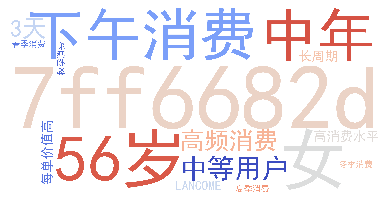

In [53]:
import os
os.chdir(r'E:/pycharm codes/百货商场用户画像描绘与价值分析/data/data')
import pandas as pd
import wordcloud
import warnings
import matplotlib.pyplot as plt
warnings.filterwarnings('ignore')
data = pd.read_csv('task3.csv', encoding='gbk')
sample = data[data['会员卡号'] == '7ff6682d']
sample['年龄'] = sample['年龄'].astype(str)+'岁'
sample = sample[['会员卡号', '性别', '年龄','年龄分段', '时段偏好', 
                 '季节偏好', '入会程度', '消费频率', 'R',
                 '消费水平', '平均每单价值', '商品偏好', '购买周期']]
sample['R'] = sample['R'].astype(str)+'天'
sample['季节偏好'] = sample['季节偏好']+'季消费'
sample['时段偏好'] = sample['时段偏好']+'消费'
words_count=[]
for i in sample.columns:
    x=sample[i].value_counts()
    words_count.append(x)
words_count = pd.concat(words_count)
words_count = words_count[words_count>0]
words_count = words_count.reset_index()
dic = {x[0]:x[1] for x in words_count.loc[:,:].values}
wc= wordcloud.WordCloud(scale=16, font_path='simhei.ttf', 
                        background_color='white',colormap="coolwarm")
X = wc.generate_from_frequencies(dic)
plt.axis('off')
plt.imshow(X)

## 会员精细划分

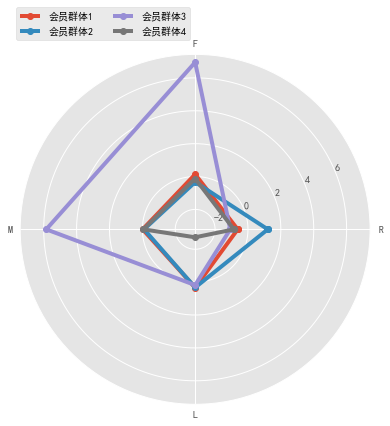

In [55]:
import os
os.chdir(r'E:/pycharm codes/百货商场用户画像描绘与价值分析/data/data')
import pandas as pd
import numpy as np
import warnings
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
warnings.filterwarnings('ignore')
plt.rcParams['font.sans-serif'] = ['SimHei']  # 用来正常显示中文标签
plt.rcParams['axes.unicode_minus'] = False  # 用来正常显示负号
plt.style.use('ggplot') # 定义绘图风格
data = pd.read_csv('task3.csv', encoding='gbk') # 导入数据
vip_data = data[['会员卡号', 'R', 'F', 'M', '入会程度']].drop_duplicates()
vip_data.columns = ['会员卡号', 'R', 'F', 'M', 'L']
sc = StandardScaler()
vip_feature = vip_data.loc[:, ['R', 'F', 'M', 'L']]
def subdata(x=None):
    if x == '老用户':
        return 2
    elif x == '中等用户':
        return 1
    else:
        return 0
vip_feature['L'] = vip_feature['L'].apply(subdata)
vip_feature = sc.fit_transform(vip_feature)
model = KMeans(n_clusters=4,random_state=0,max_iter=500)
fit_model =  model.fit(vip_feature)
# 给每个会员添加聚类类别
k_lables = fit_model.labels_
results = pd.Series(k_lables, index=vip_data['会员卡号'])
results
results.rename('聚类类别', inplace=True)
data.merge(results.reset_index())
#聚类中心
# print('聚类中心\n',model.cluster_centers_)
# print('类别\n',pd.Series(model.labels_).value_counts())
data11 = model.cluster_centers_
angles = np.linspace(0,2*np.pi,4,endpoint=False)
angles = np.concatenate((angles,[angles[0]]))
centers = model.cluster_centers_
plot_data = np.concatenate((centers,centers[:,[0]]),axis=1)
label = ['R','F','M', 'L']
fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(111,polar = True)
for i in range(len(plot_data)):
    ax.plot(angles, plot_data[i], 'o-', label='会员群体'+str(i+1))
    ax.set_thetagrids(angles*180/np.pi, label)
plt.legend(bbox_to_anchor=(0.5, 1.15),ncol=2)
plt.show()